# Predicting heart disease using machine learning
This notebook looks into using various Python-based machine learning and data science
libraries in an attempt to build a machine learning model capable of predicting whether or
not someone has heart disease based on their medical attributes.
We're going to take the following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition
> In a statement,Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data
The original data came from the Cleavland data from the UCI Machine Learning Repository.
https://archive.ics.uci.edu/ml/datasets/heart+Disease 

There is also a version of it available on Kaggle. 
https://www.kaggle.com/ronitf/heart-disease-uci

## 3. Evaluation
> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

## 4. Features

* Create data dictionary*
* age age in years
* sex (1 male; 0= female);
* cp chest pain type
* trestbpsresting blood pressure in mm Hg on admission to the hospital)
* cholserum cholestoral in mg/dl
* fbs (fasting blood sugar> 120 mg/dl (1 = true; 0 = false)
* restecgresting electrocardiographic results
* thalachmaximum heart rate achieved Q
* exangexercise induced angina (1 = yes: 0 = no)
* oldpeakST depression induced by exercise relative to rest
* slopethe slope of the peak exercise ST segment
* canumber of major vessels (0-3) colored by flourosopy
* thal3 = normal; 6 = fixed defect; 7 = reversable defect
* target1 or 0

## Tools used

Importing all the tools needed for data analysis and manipulation.

Installing seaborn directly from jupyter notebook

In [4]:
import sys
!conda install --yes --prefix {sys.prefix} seaborn


Retrieving notices: ...working... done
Solving environment: ...working... done

# All requested packages already installed.



In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
 
# Models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Model Evaluation metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score

from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report

In [6]:
df = pd.read_csv('heart-disease.csv')
df.shape

(303, 14)

# Data Exploration (exploratory data analysis or EDA)
The goal here is to find out more about the data and become a subject matter export on the dataset 
1. What question(s) are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?m

In [7]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<Axes: >

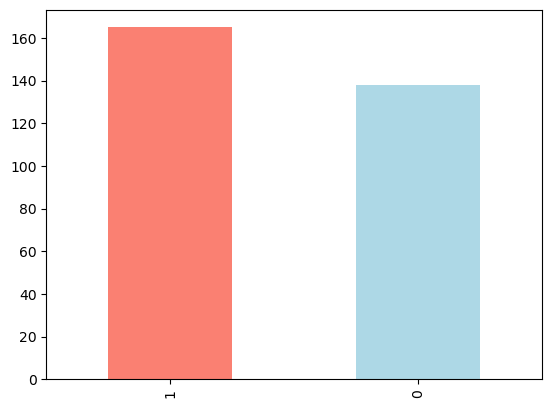

In [8]:
df['target'].value_counts().plot(kind='bar',color=['salmon','lightblue'])

In [9]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [11]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [12]:
# compare target with sex column
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


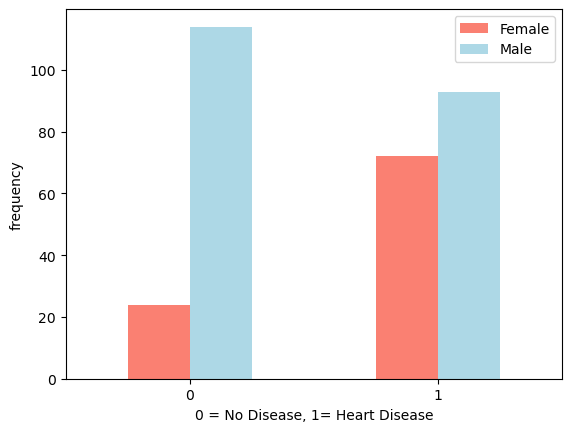

In [13]:
# plotting the croostab
pd.crosstab(df.target,df.sex).plot(kind='bar',color=['salmon','lightblue'])
plt.legend(['Female','Male'])
plt.xlabel('0 = No Disease, 1= Heart Disease')
plt.ylabel('frequency');
plt.xticks(rotation=0);

In [14]:
df.thalach.value_counts()

162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: thalach, Length: 91, dtype: int64

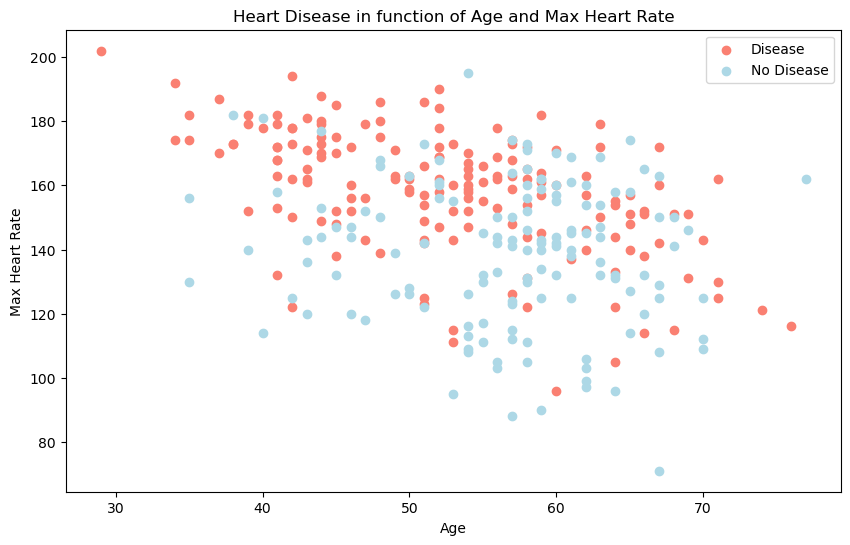

In [15]:
plt.figure(figsize=(10,6))

plt.scatter(df.age[df.target==1],df.thalach[df.target==1],c='salmon')
plt.scatter(df.age[df.target==0],df.thalach[df.target==0],c='lightblue')

plt.title('Heart Disease in function of Age and Max Heart Rate')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.legend(['Disease','No Disease']);

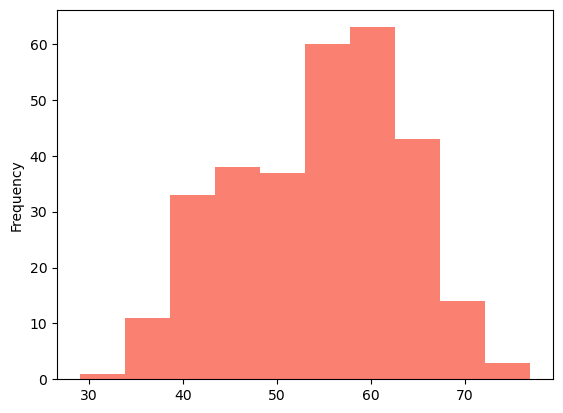

In [16]:
df.age.plot.hist(color='salmon');

In [17]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


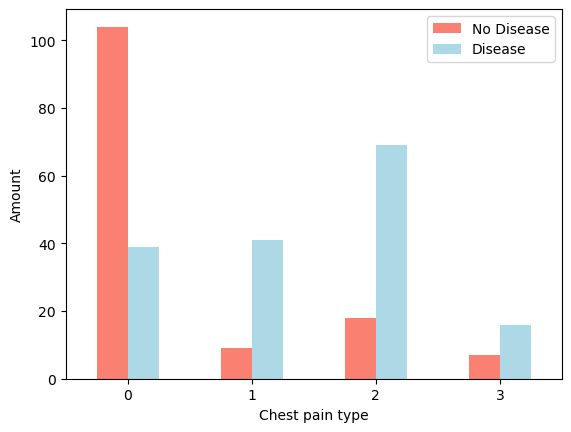

In [18]:
pd.crosstab(df.cp,df.target).plot.bar(color=['salmon','lightblue'])
plt.legend(['No Disease','Disease'])
plt.xlabel('Chest pain type')
plt.ylabel('Amount');
plt.xticks(rotation=0);

In [19]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


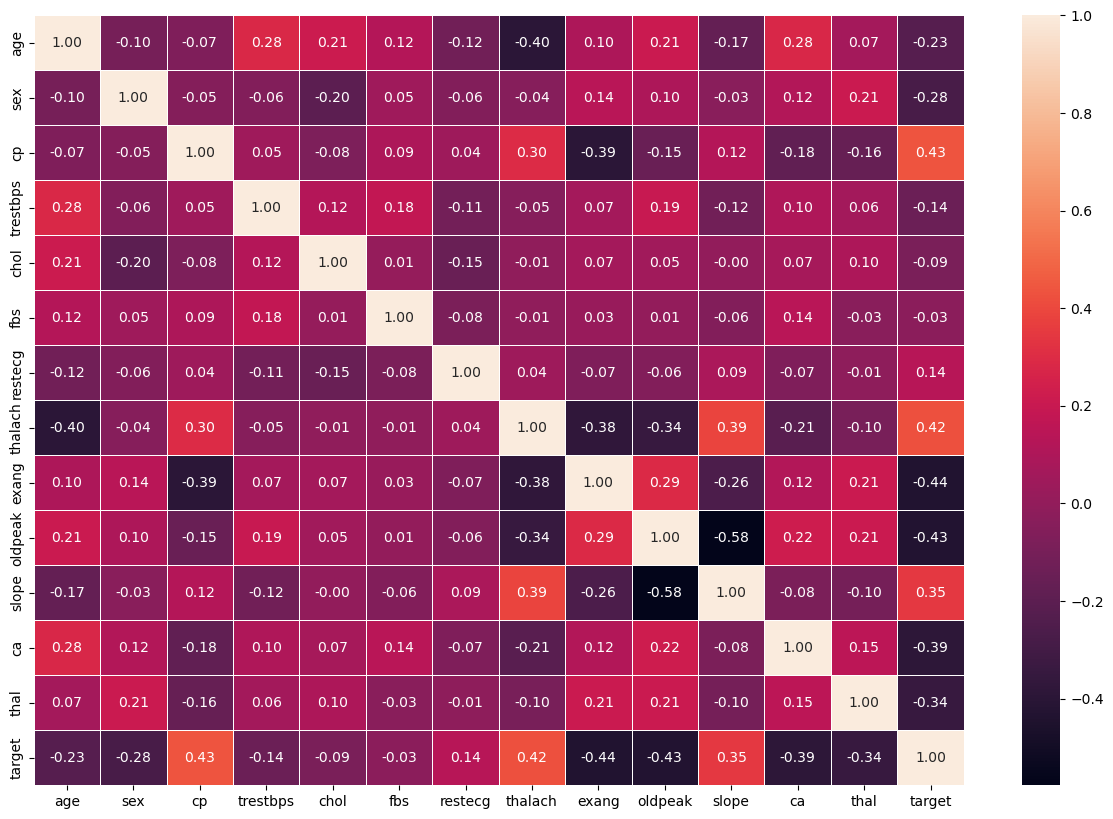

In [20]:
# plotting the correlation  matrix
corr_matrix = df.corr()
fig , ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,annot=True, linewidths=0.5, fmt='.2f');

In [21]:
X = df.drop('target',axis=1)
y = df['target']

In [22]:
np.random.seed(42)
X_train , X_test, y_train , y_test = train_test_split(X,y, test_size=0.2)

# Building the model


In [23]:
models  = {'Logistic Regression': LogisticRegression(),
          'KNN': KNeighborsClassifier(),
          'Random Forest': RandomForestClassifier()}
def fit_and_score(models,X_train , X_test, y_train , y_test):
    np.random.seed(42)
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train,y_train)
        model_scores[name]= model.score(X_test,y_test)
    return model_scores

In [24]:
model_scores = fit_and_score(models=models ,X_train=X_train , X_test=X_test, y_train=y_train , y_test=y_test)

C:\Users\bhanu\Desktop\ML_bootcamp\heart-disease-project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [25]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

In [26]:
model_compare = pd.DataFrame(model_scores,index=['Accuracy'])

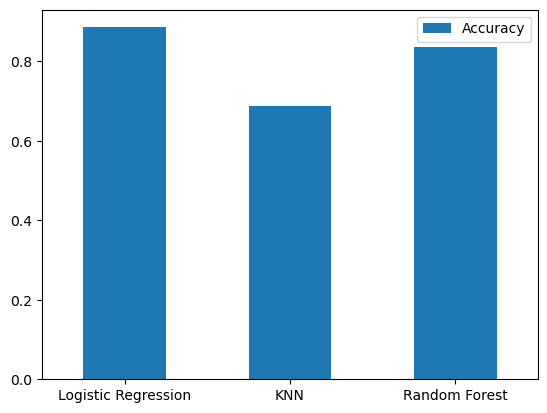

In [27]:
model_compare.T.plot.bar()
plt.xticks(rotation=0);


* Hyperparameter tuning
* Feature Importance
* Confusion matrix
* Cross-validation
* Precision
* Recall 
* F1 score
* Classification Report
* Roc curve
* Area under the curve

In [28]:
# Hyperparameter tuning for KNN

train_scores=[]
test_scores=[]

neighbors = range(1,21)

knn = KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train,y_train)
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))
    
    

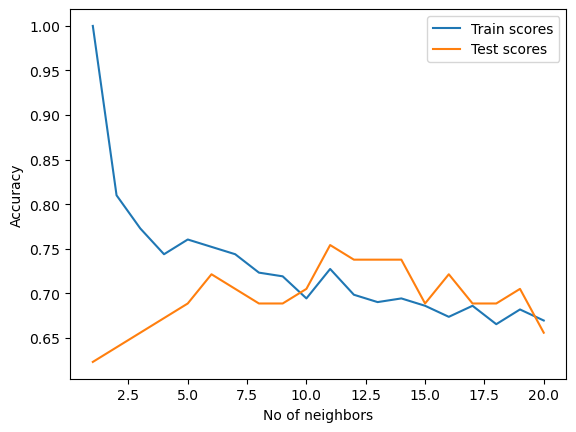

In [29]:
plt.plot(neighbors,train_scores,label='Train scores')
plt.plot(neighbors,test_scores,label='Test scores');
plt.legend()
plt.xlabel('No of neighbors')
plt.ylabel('Accuracy');

# Hyper parameter tuning for logistic regression and random forest

In [30]:
logistic_regression_grid = {
    'C':np.logspace(-4,4,20),
    'solver':['liblinear']
}
random_forest_grid = {
    'n_estimators':np.arange(10,1000,50),
    'max_depth':[None,3,5,10],
    'min_samples_split':np.arange(2,20,2),
    'min_samples_leaf':np.arange(1,20,2)
}

In [31]:
np.random.seed(42)
rs_log_reg = RandomizedSearchCV(LogisticRegression(),param_distributions=logistic_regression_grid,cv=5,n_iter=20,verbose=True)
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [32]:
rs_log_reg.score(X_test,y_test)

0.8852459016393442

In [33]:
np.random.seed(42)
rs_rf = RandomizedSearchCV(RandomForestClassifier(),param_distributions=random_forest_grid,cv=5,n_iter=20,verbose=True)
rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [34]:
rs_rf.score(X_test,y_test)

0.8688524590163934

In [35]:
# Using GridSearchCV

log_reg_grid = {
    'C':np.logspace(-4,4,30),
    'solver':['liblinear']
}


np.random.seed(42)
gs_log_reg = GridSearchCV(LogisticRegression(),param_grid=log_reg_grid,cv=5,verbose=True)
gs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [36]:
gs_log_reg.score(X_test,y_test)

0.8852459016393442

* ROC AUC
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification Report
To make comparisons and evaluate our model

In [37]:
y_preds = gs_log_reg.predict(X_test)

In [38]:
fpr, tpr, thresholds = roc_curve(y_test,y_preds)
roc_auc = auc(fpr, tpr)

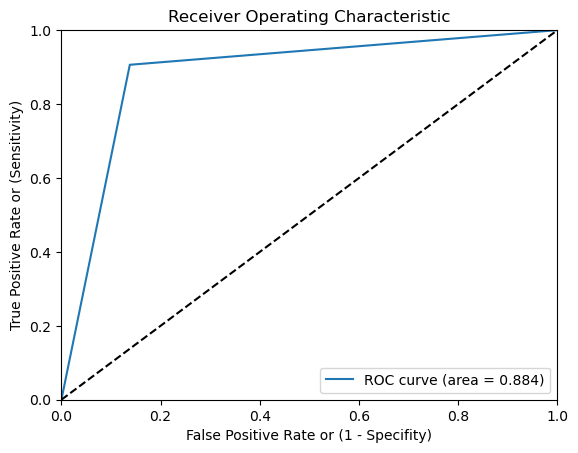

In [39]:
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

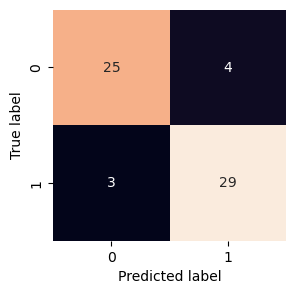

In [40]:
def plot_conf_matrix(y_test,y_preds):
    fig, ax =plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),annot=True,cbar=False)
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    
plot_conf_matrix(y_test=y_test,y_preds=y_preds)

In [43]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [44]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [50]:
# Cross validation model using the best params from the linear regression
clf = LogisticRegression(C=0.20433597178569418,solver= 'liblinear')

In [55]:
cv_acc = cross_val_score(clf,X,y,cv=5,scoring='accuracy')
cv_acc = cv_acc.mean()
cv_acc

0.8446994535519124

In [54]:
cv_precision = cross_val_score(clf,X,y,cv=5,scoring='precision')
cv_precision = cv_precision.mean()
cv_precision

0.8207936507936507

In [56]:
cv_recall = cross_val_score(clf,X,y,cv=5,scoring='recall')
cv_recall = cv_recall.mean()
cv_recall

0.9212121212121213

In [58]:
cv_f1 = cross_val_score(clf,X,y,cv=5,scoring='f1')
cv_f1 = cv_f1.mean()
cv_f1

0.8673007976269721

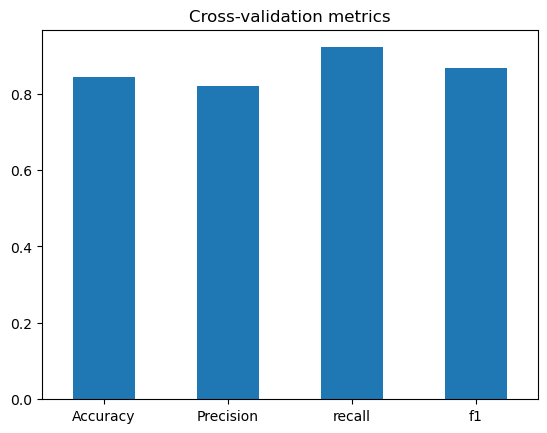

In [65]:
# Visualizing cross validation metrics

cv_metrics = pd.DataFrame({'Accuracy':cv_acc,
                          'Precision':cv_precision,
                          'recall':cv_recall,
                          'f1':cv_f1},index=[0])
cv_metrics.T.plot.bar(title='Cross-validation metrics',legend=False)
plt.xticks(rotation=0);

In [67]:
# Feature Importance
clf.fit(X_train,y_train)
clf.coef_

array([[ 0.00316728, -0.86044651,  0.66067041, -0.01156993, -0.00166374,
         0.04386107,  0.31275847,  0.02459361, -0.6041308 , -0.56862804,
         0.45051628, -0.63609897, -0.67663373]])

In [74]:
feature = dict(zip(df.columns,clf.coef_[0]))
feature

{'age': 0.0031672801993431563,
 'sex': -0.8604465072345515,
 'cp': 0.6606704082033799,
 'trestbps': -0.01156993168080875,
 'chol': -0.001663744504776871,
 'fbs': 0.043861071652469864,
 'restecg': 0.31275846822418324,
 'thalach': 0.024593613737779126,
 'exang': -0.6041308000615746,
 'oldpeak': -0.5686280368396555,
 'slope': 0.4505162797258308,
 'ca': -0.6360989676086223,
 'thal': -0.6766337263029825}

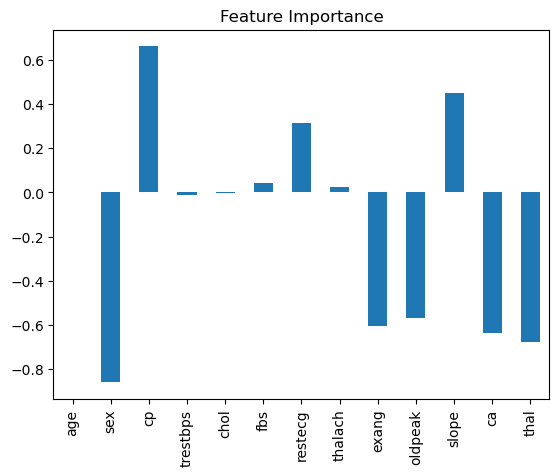

In [80]:
feature_df = pd.DataFrame(feature,index=[0])
feature_df.T.plot.bar(title='Feature Importance',legend=False);
